In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv(r"C:\\Users\\nanic\Downloads\\amazon_products_sales_data_cleaned.csv")
df.head(2)


,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  str    
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  str    
 7   is_sponsored          42675 non-null  str    
 8   has_coupon            42675 non-null  str    
 9   buy_box_availability  28022 non-null  str    
 10  delivery_date         30692 non-null  str    
 11  sustainability_tags   3408 non-null   str    
 12  product_image_url     42675 non-null  str    
 13  product_page_url      40606 non-null  str    
 14  data_collected_at     42675 non-null  str    
 15  product_category      42675 no

In [5]:
df.isnull().sum()*100 / len(df)

product_title            0.000000
product_rating           2.399531
total_reviews            2.399531
purchased_last_month    24.630346
discounted_price         4.831869
original_price           4.831869
is_best_seller           0.000000
is_sponsored             0.000000
has_coupon               0.000000
buy_box_availability    34.336262
delivery_date           28.079672
sustainability_tags     92.014060
product_image_url        0.000000
product_page_url         4.848272
data_collected_at        0.000000
product_category         0.000000
discount_percentage      4.831869
dtype: float64

In [6]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
42670    False
42671    False
42672    False
42673    False
42674    False
Length: 42675, dtype: bool>

### action items

In [7]:
df.columns

Index(['product_title', 'product_rating', 'total_reviews',
       'purchased_last_month', 'discounted_price', 'original_price',
       'is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability',
       'delivery_date', 'sustainability_tags', 'product_image_url',
       'product_page_url', 'data_collected_at', 'product_category',
       'discount_percentage'],
      dtype='str')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_rating,41651.0,4.399431,0.386997,1.00,4.20,4.50,4.70,5.00
total_reviews,41651.0,3087.106000,13030.460133,1.00,82.00,343.00,1886.00,865598.00
purchased_last_month,32164.0,1293.665278,6318.323574,50.00,100.00,200.00,400.00,100000.00
discounted_price,40613.0,243.227289,473.351545,2.16,29.69,84.99,224.00,5449.00
original_price,40613.0,257.611107,496.633495,2.16,32.99,89.00,229.99,5449.00
discount_percentage,40613.0,6.547151,12.744715,0.00,0.00,0.00,8.49,85.42


In [9]:
num_df=df.select_dtypes(include="number")
cat_df=df.select_dtypes(exclude="number")

In [10]:
cat_df

,product_title,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones
...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",No Badge,Organic,No Coupon,NaN,2025-09-04,NaN,https://m.media-amazon.com/images/I/51KCB+egEs...,https://www.amazon.com/Elgato-4K-Pro-Internal-...,2025-08-30 19:56:33,TV & Display
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",No Badge,Organic,Save $25.00 with coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/51jV+o1LZE...,https://www.amazon.com/Arlo-Essential-Spotligh...,2025-08-30 19:56:33,Cameras
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",Save 18%,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/71ySPkNLkG...,https://www.amazon.com/GIGABYTE-FO32U2-32-3840...,2025-08-30 19:56:33,Chargers & Cables
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,No Badge,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/411c0JFJ79...,https://www.amazon.com/Monoprice-XLR-Male-4-In...,2025-08-30 19:56:33,Chargers & Cables


In [11]:
num_df.isna().sum()

product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
discount_percentage      2062
dtype: int64

In [12]:
num_df["product_rating"].median()

np.float64(4.5)

In [13]:
for column in num_df.columns:
   num_df[column]= num_df[column].fillna(num_df[column].median())

In [14]:
num_df.isna().sum()

product_rating          0
total_reviews           0
purchased_last_month    0
discounted_price        0
original_price          0
discount_percentage     0
dtype: int64

In [15]:
cat_df["buy_box_availability"].mode().values[0]

'Add to cart'

In [16]:
for column in cat_df:
    mode_value=(cat_df[column].mode().values[0])
    cat_df[column]=cat_df[column].fillna(mode_value)

In [17]:
cat_df.isna().sum()

product_title           0
is_best_seller          0
is_sponsored            0
has_coupon              0
buy_box_availability    0
delivery_date           0
sustainability_tags     0
product_image_url       0
product_page_url        0
data_collected_at       0
product_category        0
dtype: int64

In [18]:
df=pd.concat([num_df,cat_df],axis=1)
df.head()

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,discount_percentage,product_title,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category
0,4.6,375.0,300.0,89.68,159.00,43.60,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones
1,4.3,2457.0,6000.0,9.99,15.99,37.52,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,Small Business,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops
2,4.6,3044.0,2000.0,314.00,349.00,10.03,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,Small Business,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops
3,4.6,35882.0,10000.0,162.24,162.24,0.00,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",Best Seller,Organic,No Coupon,Add to cart,2025-09-04,Small Business,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones
4,4.8,28988.0,10000.0,72.74,72.74,0.00,Apple AirTag 4 Pack. Keep Track of and find Yo...,No Badge,Organic,No Coupon,Add to cart,2025-09-04,Small Business,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones


In [19]:
df.isna().sum()

product_rating          0
total_reviews           0
purchased_last_month    0
discounted_price        0
original_price          0
discount_percentage     0
product_title           0
is_best_seller          0
is_sponsored            0
has_coupon              0
buy_box_availability    0
delivery_date           0
sustainability_tags     0
product_image_url       0
product_page_url        0
data_collected_at       0
product_category        0
dtype: int64

In [20]:
df["total_reviews"]=df["total_reviews"].astype(int)
df["purchased_last_month"]=df["purchased_last_month"].astype(int)

In [21]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_rating        42675 non-null  float64
 1   total_reviews         42675 non-null  int64  
 2   purchased_last_month  42675 non-null  int64  
 3   discounted_price      42675 non-null  float64
 4   original_price        42675 non-null  float64
 5   discount_percentage   42675 non-null  float64
 6   product_title         42675 non-null  str    
 7   is_best_seller        42675 non-null  str    
 8   is_sponsored          42675 non-null  str    
 9   has_coupon            42675 non-null  str    
 10  buy_box_availability  42675 non-null  str    
 11  delivery_date         42675 non-null  str    
 12  sustainability_tags   42675 non-null  str    
 13  product_image_url     42675 non-null  str    
 14  product_page_url      42675 non-null  str    
 15  data_collected_at     42675 no

In [22]:
df["delivery_data"]=pd.to_datetime(df["delivery_date"],errors="coerce")
df["data_collected_at"]=pd.to_datetime(df["data_collected_at"],errors="coerce")

In [29]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_rating        42675 non-null  float64       
 1   total_reviews         42675 non-null  int64         
 2   purchased_last_month  42675 non-null  int64         
 3   discounted_price      42675 non-null  float64       
 4   original_price        42675 non-null  float64       
 5   discount_percentage   42675 non-null  float64       
 6   product_title         42675 non-null  str           
 7   is_best_seller        42675 non-null  str           
 8   is_sponsored          42675 non-null  str           
 9   has_coupon            42675 non-null  str           
 10  buy_box_availability  42675 non-null  str           
 11  delivery_date         42675 non-null  str           
 12  product_image_url     42675 non-null  str           
 13  product_page_url      42675

In [24]:
df.drop(columns=["sustainability_tags"], inplace=True)


In [25]:
df.head(2)

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,discount_percentage,product_title,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,product_image_url,product_page_url,data_collected_at,product_category,delivery_data
0,4.6,375,300,89.68,159.00,43.60,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,2025-09-01
1,4.3,2457,6000,9.99,15.99,37.52,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,2025-08-29


In [26]:
df["discounted_amount"]=df["original_price"]-df["discounted_price"]

In [27]:
df["estimeted_revenu"]=df["discounted_price"] * df["purchased_last_month"]

In [28]:
df["percantage_band"]=pd.cut(x=df["discount_percentage"],
                             bins=[0,10,40,70,99],
                             labels=["less discount","medium discouint","high discount","very high disount"])

In [30]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_rating        42675 non-null  float64       
 1   total_reviews         42675 non-null  int64         
 2   purchased_last_month  42675 non-null  int64         
 3   discounted_price      42675 non-null  float64       
 4   original_price        42675 non-null  float64       
 5   discount_percentage   42675 non-null  float64       
 6   product_title         42675 non-null  str           
 7   is_best_seller        42675 non-null  str           
 8   is_sponsored          42675 non-null  str           
 9   has_coupon            42675 non-null  str           
 10  buy_box_availability  42675 non-null  str           
 11  delivery_date         42675 non-null  str           
 12  product_image_url     42675 non-null  str           
 13  product_page_url      42675

In [ ]:
df.head()

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,discount_percentage,product_title,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,product_image_url,product_page_url,data_collected_at,product_category,delivery_data,discounted_amount,estimeted_revenu,percantage_band
0,4.6,375,300,89.68,159.00,43.60,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,2025-09-01,69.32,26904.0,high discount
1,4.3,2457,6000,9.99,15.99,37.52,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,2025-08-29,6.00,59940.0,medium discouint
2,4.6,3044,2000,314.00,349.00,10.03,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,2025-09-01,35.00,628000.0,medium discouint
3,4.6,35882,10000,162.24,162.24,0.00,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",Best Seller,Organic,No Coupon,Add to cart,2025-09-04,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,2025-09-04,0.00,1622400.0,NaN
4,4.8,28988,10000,72.74,72.74,0.00,Apple AirTag 4 Pack. Keep Track of and find Yo...,No Badge,Organic,No Coupon,Add to cart,2025-09-04,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,2025-09-04,0.00,727400.0,NaN


In [32]:
df['percantage_band'].value_counts()

percantage_band
medium discouint     7969
less discount        3057
high discount        1146
very high disount     139
Name: count, dtype: int64

In [33]:
df['total_reviews'].describe()

count     42675.000000
mean       3021.260316
std       12880.020115
min           1.000000
25%          84.000000
50%         343.000000
75%        1825.500000
max      865598.000000
Name: total_reviews, dtype: float64

### bi variate analysis

### cat vs num

In [34]:
df[['is_sponsored','purchased_last_month']].head()

,is_sponsored,purchased_last_month
0,Sponsored,300
1,Sponsored,6000
2,Sponsored,2000
3,Organic,10000
4,Organic,10000


In [36]:
df.groupby(['is_sponsored'])["purchased_last_month"].sum()

is_sponsored
Organic      15354850
Sponsored    28356800
Name: purchased_last_month, dtype: int64

<Axes: xlabel='is_sponsored'>

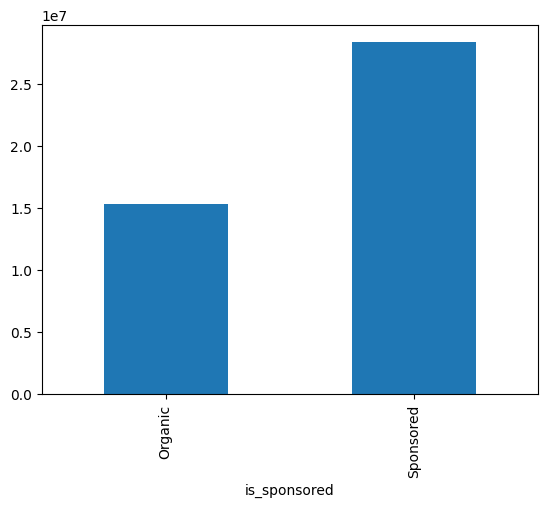

In [35]:
df.groupby(['is_sponsored'])["purchased_last_month"].sum().plot(kind="bar")

In [41]:
df.groupby(['product_category'])["purchased_last_month"].sum().sort_values(ascending=False)

product_category
Power & Batteries      26170250
Other Electronics       4091800
Phones                  3880950
Laptops                 3828250
Cameras                 1050900
TV & Display             967150
Chargers & Cables        879550
Wearables                786850
Storage                  628050
Networking               321850
Speakers                 301950
Printers & Scanners      290450
Headphones               230350
Gaming                   152100
Smart Home               131200
Name: purchased_last_month, dtype: int64

<Axes: xlabel='product_category'>

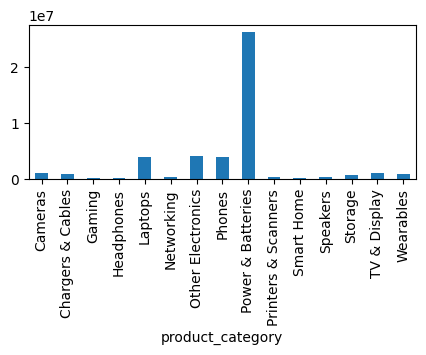

In [42]:
df.groupby(['product_category'])["purchased_last_month"].sum().plot(kind="bar",figsize=(5,2))

In [45]:
pd.crosstab(index=df["is_sponsored"],columns=df["product_category"])

product_category,Cameras,Chargers & Cables,Gaming,Headphones,Laptops,Networking,Other Electronics,Phones,Power & Batteries,Printers & Scanners,Smart Home,Speakers,Storage,TV & Display,Wearables
is_sponsored,,,,,,,,,,,,,,,
Organic,3109,1573,797,798,8061,837,8568,5190,1339,877,456,1119,1097,1407,436
Sponsored,568,260,12,199,632,233,187,1373,1538,0,9,226,533,1223,18


In [46]:
df[["discounted_price","purchased_last_month"]].head()

,discounted_price,purchased_last_month
0,89.68,300
1,9.99,6000
2,314.00,2000
3,162.24,10000
4,72.74,10000


In [48]:
df[["product_rating","purchased_last_month"]].corr()

,product_rating,purchased_last_month
product_rating,1.000000,0.134106
purchased_last_month,0.134106,1.000000


In [50]:
df.columns

Index(['product_rating', 'total_reviews', 'purchased_last_month',
       'discounted_price', 'original_price', 'discount_percentage',
       'product_title', 'is_best_seller', 'is_sponsored', 'has_coupon',
       'buy_box_availability', 'delivery_date', 'product_image_url',
       'product_page_url', 'data_collected_at', 'product_category',
       'delivery_data', 'discounted_amount', 'estimeted_revenu',
       'percantage_band'],
      dtype='str')

In [52]:
df[["product_category","is_sponsored","purchased_last_month"]].head(2)

,product_category,is_sponsored,purchased_last_month
0,Phones,Sponsored,300
1,Laptops,Sponsored,6000


In [55]:
pd.pivot_table(df,index=["product_category"]
               ,columns=["is_sponsored"],
               values=["purchased_last_month"],aggfunc="sum")

purchased_last_month            
is_sponsored                     Organic   Sponsored
product_category                                    
Cameras                         873000.0    177900.0
Chargers & Cables               830950.0     48600.0
Gaming                          149700.0      2400.0
Headphones                      206100.0     24250.0
Laptops                        3235100.0    593150.0
Networking                      270750.0     51100.0
Other Electronics              3994500.0     97300.0
Phones                         2194750.0   1686200.0
Power & Batteries              1562850.0  24607400.0
Printers & Scanners             290450.0         NaN
Smart Home                      129600.0      1600.0
Speakers                        256950.0     45000.0
Storage                         461950.0    166100.0
TV & Display                    641350.0    325800.0
Wearables                       256850.0    530000.0